In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import sklearn
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets


from pylab import rcParams

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score

In [3]:
%matplotlib inline
plt.figure(figsize= (7 , 4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [4]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [5]:
clustering = KMeans(n_clusters = 3 , random_state = 5 )
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [6]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length' , 'Sepal_Width' , 'Petal_Length' , 'Peatal_Width']
y.columns = ['Targets']

Text(0.5, 1.0, 'k-Means Classification')

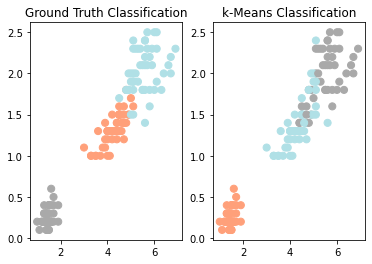

In [7]:
color_theme = np.array(['darkgray' , 'lightsalmon' , 'powderblue'])

plt.subplot(1 , 2 , 1)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Peatal_Width, c=color_theme[iris.target], s = 50)
plt.title('Ground Truth Classification')

plt.subplot(1 , 2 , 2)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Peatal_Width, c=color_theme[clustering.labels_], s = 50)
plt.title('k-Means Classification')




Text(0.5, 1.0, 'k-Means Classification')

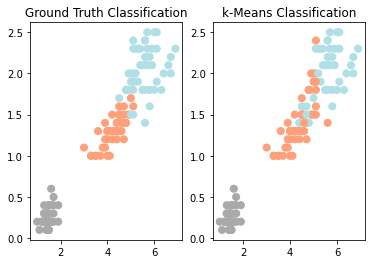

In [8]:
relabel = np.choose(clustering.labels_, [2 , 0 , 1]).astype(np.int64)

color_theme = np.array(['darkgray' , 'lightsalmon' , 'powderblue'])

plt.subplot(1 , 2 , 1)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Peatal_Width, c=color_theme[iris.target], s = 50)
plt.title('Ground Truth Classification')

plt.subplot(1 , 2 , 2)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Peatal_Width, c=color_theme[relabel], s = 50)
plt.title('k-Means Classification')

In [9]:
print(classification_report(y , relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

